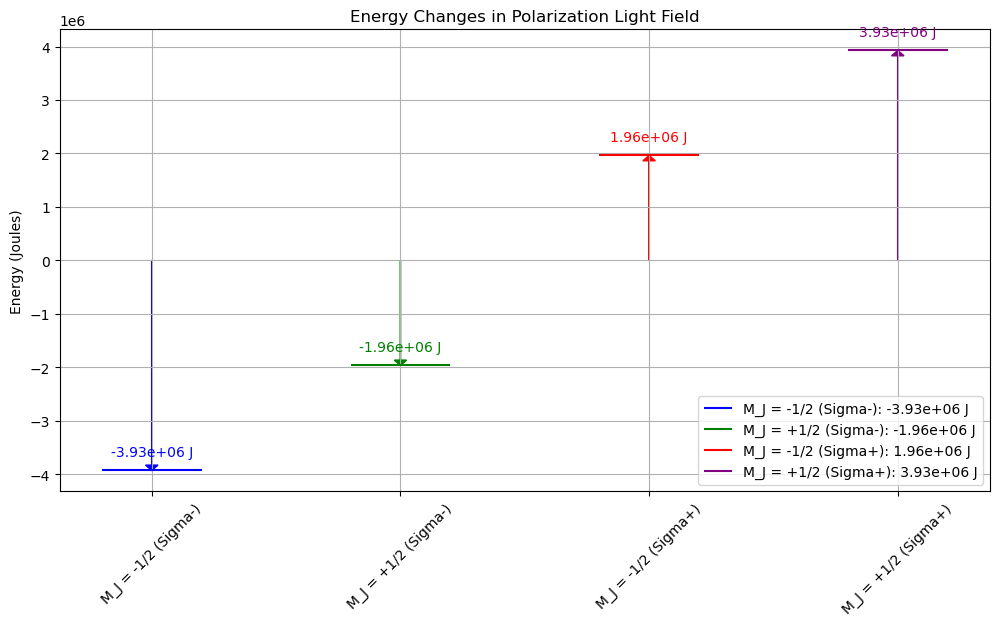

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Omega = 2 * np.pi * 5e6  # Rabi frequency in Hz for matched transitions
Delta = 2 * np.pi * 10e6  # Detuning in Hz

# Energy shift calculation including polarization matching
def light_shift(Omega, Delta, matching):
    """Calculate light shift with a matching factor for polarization compatibility."""
    return matching * Omega**2 / (4 * Delta)

# Matching factors: 1 for matched polarization and transitions, 0.5 for mismatched
matching_factors = {
    'M_J = -1/2 (Sigma-)': 1,
    'M_J = +1/2 (Sigma-)': 0.5,
    'M_J = -1/2 (Sigma+)': 0.5,
    'M_J = +1/2 (Sigma+)': 1
}

# Calculate energy levels considering the matching factors for different polarizations
energy_levels_updated = {key: light_shift(Omega, Delta if 'Sigma+' in key else -Delta, match)
                         for key, match in matching_factors.items()}

# Define colors for each condition
colors = {
    'M_J = -1/2 (Sigma-)': 'blue',
    'M_J = +1/2 (Sigma-)': 'green',
    'M_J = -1/2 (Sigma+)': 'red',
    'M_J = +1/2 (Sigma+)': 'purple'
}

# Plotting with individual colors for each condition and arrows to show displacement
plt.figure(figsize=(12, 6))
for i, (key, energy) in enumerate(energy_levels_updated.items()):
    color = colors[key]  # Get specific color for each line
    plt.hlines(energy, i - 0.2, i + 0.2, colors=color, label=f'{key}: {energy:.2e} J')
    # Annotate the displacement value
    plt.annotate(f'{energy:.2e} J', (i, energy), textcoords="offset points", xytext=(0,10), ha='center', color=color)
    # Draw arrows showing displacement
    base_energy = 0  # Base level for energy before displacement
    plt.arrow(i, base_energy, 0, energy - base_energy, color=color, length_includes_head=True, head_width=0.05, head_length=0.1e6)

plt.title('Energy Changes in Polarization Light Field')
plt.xticks(range(len(energy_levels_updated)), energy_levels_updated.keys(), rotation=45)
plt.ylabel('Energy (Joules)')
plt.grid(True)
plt.legend(loc='lower right')  # Moving legend to the bottom right to avoid blocking data
plt.show()
